###Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn import utils
%matplotlib inline

In [2]:
RegData  = np.genfromtxt("RegData.csv",delimiter = ",")
x_RegPoints = RegData[:,0]
y_RegPoints = RegData[:,1]

## AdaGrad ##
>**Advanges**: paramters corresponding to sparse features get better updates

>**Disadvanges**: could kill the learning rate (**Not goof for parameters corresponding to dense features**) 


In [3]:
def AdaGrad_batchGD(x,y,learning_rate = 0.001,Epoch = 1000):
  theta0,theta1,vt0,vt1 = 0,0,0,0
  epsilon = 0.001
  m = len(y)
  costs, thetas0,thetas1 = [],[],[]
  for i in range(Epoch):
    y_hat  = theta0 + theta1 * x
    e = y_hat - y
    cost = np.sum(e**2)/(2*m)
    costs.append(cost)

    gradient0 = np.sum(e)/m
    gradient1 = np.dot(e.T,x)/ m 

    vt0 = vt0 + (gradient0**2)
    vt1 = vt1 + (gradient1**2)

    theta0 = theta0 - (learning_rate/np.sqrt(vt0)+epsilon) *gradient0
    theta1 = theta1 - (learning_rate/np.sqrt(vt1)+epsilon) *gradient1

    thetas0.append(theta0)
    thetas1.append(theta1)
    if(i>0 and np.abs(costs[i]-costs[i-1])<0.001):
      print("stopped at iteration {}".format(i))
      break

  return costs,thetas0,thetas1 

In [4]:
ada_costs,ada_thetas0,ada_thetas1 = AdaGrad_batchGD(x_RegPoints,y_RegPoints)

stopped at iteration 90


Cost function vs Epoch 

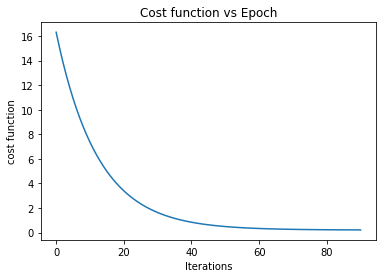

In [5]:
plt.plot(ada_costs)
plt.xlabel("Iterations")
plt.ylabel("cost function")
plt.title("Cost function vs Epoch");

Cost function vs theta0 

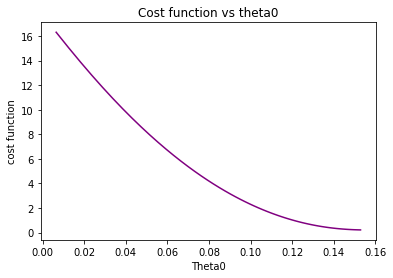

In [6]:
plt.plot(ada_thetas0,ada_costs,color="purple")
plt.xlabel("Theta0")
plt.ylabel("cost function")
plt.title("Cost function vs theta0");

Cost function vs theta1 

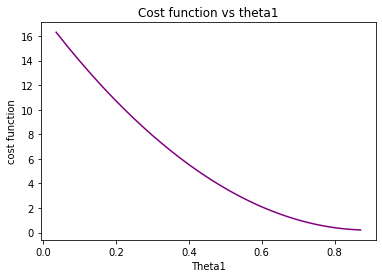

In [7]:
plt.plot(ada_thetas1,ada_costs,color="purple")
plt.xlabel("Theta1")
plt.ylabel("cost function")
plt.title("Cost function vs theta1");

Model accuracy 

In [8]:
r2_score(y_RegPoints,ada_thetas0[-1]+ada_thetas1[-1]*x_RegPoints)

0.7352989940543451

## RMSProp ##



 > RMSProp is used to solve the killing of learning rate problem caused by the **Adagrad** when dealing with dense features 

> Unlike **Adagrad** , RMSprop calculate the **gradients** using the **EWMA** Exponential weighted moving average rather than squared




In [9]:
def RMSProp(x,y,learning_rate = 0.01, Epoch = 1000, epsilon = 0.0001, beta = 0.9):
  theta0 ,theta1 , vt0,vt1 = 0,0,0,0
  thetas0,thetas1, costs=[],[],[]
  m = len(y)
  for i in range(Epoch):
    #calculate hypothsis 
    y_hat = theta0 + theta1 * x
    #calculate erro
    e = y_hat-y
    cost = np.sum(e**2)/(2*m)
    costs.append(cost)
    #calculate gradients
    gradient0 = np.sum(e)/m
    gradient1 = np.dot(e.T,x)/ m 

    #update v's
    vt0 = beta + (1-beta)*(gradient0**2)
    vt1 = beta + (1-beta)*(gradient1**2)
    #update thetas
    theta0 = theta0 - (learning_rate/(np.sqrt(vt0)+epsilon)) * gradient0
    theta1 = theta0 - (learning_rate/(np.sqrt(vt1)+epsilon)) * gradient1

    thetas0.append(theta0)
    thetas1.append(theta1)
    if(i>0 and np.abs(costs[i]-costs[i-1])<0.001):
      print("stopped at iteration {}".format(i))
      break

  return costs,thetas0,thetas1 

In [10]:
rms_costs ,rms_thetas0,rms_thetas1 = RMSProp(x_RegPoints,y_RegPoints)

stopped at iteration 62


Cost function vs Epoch 



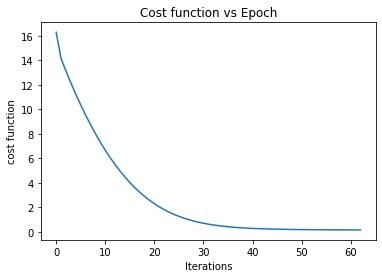

In [11]:
plt.plot(rms_costs)
plt.xlabel("Iterations")
plt.ylabel("cost function")
plt.title("Cost function vs Epoch");

# ###Cost function vs theta0

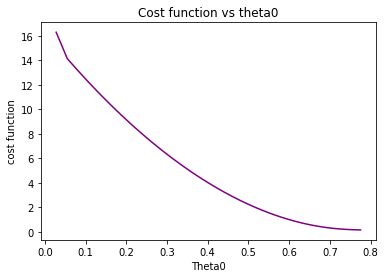

In [12]:
plt.plot(rms_thetas0,rms_costs,color="purple")
plt.xlabel("Theta0")
plt.ylabel("cost function")
plt.title("Cost function vs theta0");

####Cost function vs theta1

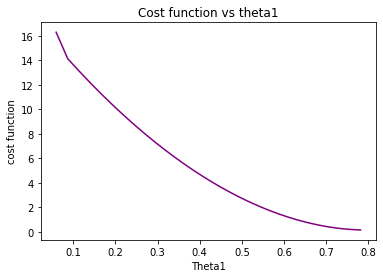

In [13]:
plt.plot(rms_thetas1,rms_costs,color="purple")
plt.xlabel("Theta1")
plt.ylabel("cost function")
plt.title("Cost function vs theta1");

Model accuracy 

In [14]:
r2_score(y_RegPoints,rms_thetas0[-1]+rms_thetas1[-1]*x_RegPoints)

0.7961579350927169

## Adam ##
> Adam introduces the concept of **adaptive momentum** along with **adaptive learning rate**


In [15]:
def adam(x,y,learning_rate = 0.01,Epoch = 1000,beta1 = 0.8,beta2 = 0.9,epsilon = 0.001):
  theta0,theta1,vt0,vt1,mt0,mt1 = 0,0,0,0,0,0
  costs,thetas0,thetas1 = [],[],[]
  m = len(y)
  for i in range(Epoch):
    #calculate hypothesis
    y_hat = theta0 + theta1*x
    #calculate error
    e = y_hat - y
    #calculate cost
    cost = np.sum(e**2)/(2*m)
    costs.append(cost)
    #calculate gradients
    gradient0 = np.sum(e)/m
    gradient1 = np.dot(e.T,x)/ m 
    #update momentums   (momentum cares for gradient direction)
    mt0 = beta1*mt0 + (1-beta1)*gradient0
    mt1 = beta1*mt1 + (1-beta2)*gradient1
    #update v's  (does't care for gradient direction)
    vt0 = beta2*vt0 + (1-beta2)*(gradient0**2)
    vt1 = beta2*vt1 + (1-beta2)*(gradient1**2)
    #update thetas
    theta0 = theta0 - learning_rate*(mt0/(np.sqrt(vt0) + epsilon))
    theta1 = theta1 - learning_rate*(mt1/(np.sqrt(vt1) + epsilon))
    thetas0.append(theta0)
    thetas1.append(theta1)
    if(i>0 and np.abs(costs[i]-costs[i-1])<0.001):
      print("stopped at iteration {}".format(i))
      break

  return costs,thetas0,thetas1 


In [16]:
adam_costs,adam_thetas0,adam_thetas1 = adam(x_RegPoints,y_RegPoints)

stopped at iteration 156


Cost function vs Epoch 

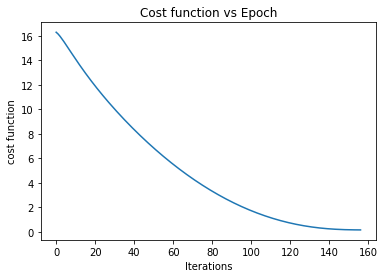

In [17]:
plt.plot(adam_costs)
plt.xlabel("Iterations")
plt.ylabel("cost function")
plt.title("Cost function vs Epoch");

####Cost function vs theta0

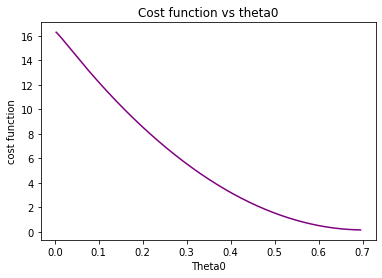

In [18]:
plt.plot(adam_thetas1,adam_costs,color="purple")
plt.xlabel("Theta0")
plt.ylabel("cost function")
plt.title("Cost function vs theta0");

####Cost function vs theta1

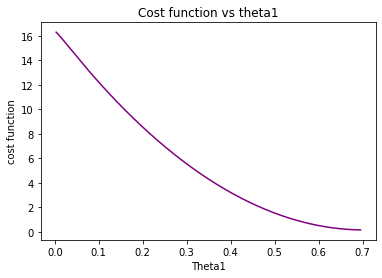

In [19]:
plt.plot(adam_thetas1,adam_costs,color="purple")
plt.xlabel("Theta1")
plt.ylabel("cost function")
plt.title("Cost function vs theta1");

Model accuracy

In [20]:
r2_score(y_RegPoints,adam_thetas0[-1]+adam_thetas1[-1]*x_RegPoints)

0.8203639774716371